In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from time import sleep
import getpass

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager


In [2]:
my_user = "Sentime29177252"
my_pass = getpass.getpass()

········


In [3]:
search_item ="Cricket Match India"

In [4]:
PATH = "C:\Program Files\Drivers\chromedriver.exe"
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
#driver.get("https://www.google.com")
#driver = webdriver.Chrome(PATH)
driver.get("https://twitter.com/i/flow/login")
# driver.maximize_window()
sleep(3)

In [5]:
user_id= driver.find_element(By.XPATH,"//input[@type='text']")
user_id.send_keys(my_user)
user_id.send_keys(Keys.ENTER)

In [6]:
password = driver.find_element(By.XPATH,"//input[@type='password']")
password.send_keys(my_pass)
password.send_keys(Keys.ENTER)

In [7]:
search_box = driver.find_element(By.XPATH,"//input[@data-testid='SearchBox_Search_Input']")
search_box.send_keys(search_item)
search_box.send_keys(Keys.ENTER)

In [8]:
all_tweets = set()


tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
while True:
    for tweet in tweets:
        all_tweets.add(tweet.text)
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    sleep(3)
    tweets = driver.find_elements(By.XPATH,"//div[@data-testid='tweetText']")
    if len(all_tweets)>50:
        break

In [9]:
all_tweets = list(all_tweets)
all_tweets[0]

'Cricket fans! #India & #Netherlands ke beech kaun jeetag aaj ka match! Predict karo! Only on Nissan’s Cricket Ka Blockbuster 2023! \n@Nissan_India\n \n\n#CKB #CKB2023 #Nissan #cricket'

In [10]:
import pandas as pd
pd.options.display.max_colwidth = 1000
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to C:\Users\Pranay
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Pranay
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
stp_words = stopwords.words('english')
print(stp_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
df = pd.DataFrame(all_tweets,columns=['tweets'])
df.head()

,tweets
0,Cricket fans! #India & #Netherlands ke beech kaun jeetag aaj ka match! Predict karo! Only on Nissan’s Cricket Ka Blockbuster 2023! \n@Nissan_India\n \n\n#CKB #CKB2023 #Nissan #cricket
1,"VIDEO | ""We knew India would register a victory against New Zealand in today's match. Even in the final of World Cup match, we expect a similar winning performance from Team India,"" says a cricket fan in Mumbai as India qualify for the cricket World Cup final beating New Zealand.…"
2,Is Modi ji coming to watch this match ? Has the current PM ever attended a India Hockey / Football match ?? His involvement can help promote these sports. Cricket is big in India and everyone including film stars and politicians milk it well . #CWC23Final #INDQAT #FIFAWCQ2026
3,Mohammed Shami once said “I will rather die than betray my country” \n India into finals \nTeam Man Shami of Indian cricket Team\n\nMan of the match (POTM) acc to me\n\n#INDvsNZ #IndiaVsNewZealand
4,"Team India arrives in Ahmedabad for a historic match in the world's biggest cricket stadium! \n\nWatch as our stars get ready for their hard-earned final match against Australia! \n\nTune-in to the Final #INDvAUS\nSUN, NOV 19, 12 PM | Star Sports Network\n#WorldCupOnStar #CWC23"


In [13]:
one_tweet=df.iloc[4]['tweets']
one_tweet

"Team India arrives in Ahmedabad for a historic match in the world's biggest cricket stadium!  \n\nWatch as our stars get ready for their hard-earned final match against Australia! \n\nTune-in to the Final #INDvAUS\nSUN, NOV 19, 12 PM | Star Sports Network\n#WorldCupOnStar #CWC23"

In [14]:
print(stp_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
from textblob import TextBlob
from wordcloud import WordCloud

def TweetCleaning(tweet):
    cleanTweet = re.sub(r"@[a-zA-Z0-9]+","",tweet)
    cleanTweet = re.sub(r"#[a-zA-Z0-9\s]+","",cleanTweet)
    cleanTweet = ' '.join(word for word in cleanTweet.split() if word not in stp_words)
    cleanTweet
    return cleanTweet

def calPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def calSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(tweet):
    if tweet > 0:
        return "positive"
    if tweet == 0:
        return "neutral"
    else:
        return "negative"

In [16]:
df = pd.DataFrame(all_tweets,columns=['tweets'])
df.head()

,tweets
0,Cricket fans! #India & #Netherlands ke beech kaun jeetag aaj ka match! Predict karo! Only on Nissan’s Cricket Ka Blockbuster 2023! \n@Nissan_India\n \n\n#CKB #CKB2023 #Nissan #cricket
1,"VIDEO | ""We knew India would register a victory against New Zealand in today's match. Even in the final of World Cup match, we expect a similar winning performance from Team India,"" says a cricket fan in Mumbai as India qualify for the cricket World Cup final beating New Zealand.…"
2,Is Modi ji coming to watch this match ? Has the current PM ever attended a India Hockey / Football match ?? His involvement can help promote these sports. Cricket is big in India and everyone including film stars and politicians milk it well . #CWC23Final #INDQAT #FIFAWCQ2026
3,Mohammed Shami once said “I will rather die than betray my country” \n India into finals \nTeam Man Shami of Indian cricket Team\n\nMan of the match (POTM) acc to me\n\n#INDvsNZ #IndiaVsNewZealand
4,"Team India arrives in Ahmedabad for a historic match in the world's biggest cricket stadium! \n\nWatch as our stars get ready for their hard-earned final match against Australia! \n\nTune-in to the Final #INDvAUS\nSUN, NOV 19, 12 PM | Star Sports Network\n#WorldCupOnStar #CWC23"


In [17]:
tweet=df
tweet

,tweets
0,Cricket fans! #India & #Netherlands ke beech kaun jeetag aaj ka match! Predict karo! Only on Nissan’s Cricket Ka Blockbuster 2023! \n@Nissan_India\n \n\n#CKB #CKB2023 #Nissan #cricket
1,"VIDEO | ""We knew India would register a victory against New Zealand in today's match. Even in the final of World Cup match, we expect a similar winning performance from Team India,"" says a cricket fan in Mumbai as India qualify for the cricket World Cup final beating New Zealand.…"
2,Is Modi ji coming to watch this match ? Has the current PM ever attended a India Hockey / Football match ?? His involvement can help promote these sports. Cricket is big in India and everyone including film stars and politicians milk it well . #CWC23Final #INDQAT #FIFAWCQ2026
3,Mohammed Shami once said “I will rather die than betray my country” \n India into finals \nTeam Man Shami of Indian cricket Team\n\nMan of the match (POTM) acc to me\n\n#INDvsNZ #IndiaVsNewZealand
4,"Team India arrives in Ahmedabad for a historic match in the world's biggest cricket stadium! \n\nWatch as our stars get ready for their hard-earned final match against Australia! \n\nTune-in to the Final #INDvAUS\nSUN, NOV 19, 12 PM | Star Sports Network\n#WorldCupOnStar #CWC23"
5,Congratulations to Team India \nWhat a massive victory in the #Cricket #WorldCup2023 Semi Final match!
6,"VIDEO | Mohammed Shami played really well in cricket match against New Zealand. I do not think that without him India would have won today's match,"" says a fan after India qualify for the cricket World Cup final beating New Zealand in Mumbai."
7,Remember what happened when India met Australia last time in a World Cup Knockout match in Ahmedabad?\nSurely everyone does \n#INDvsAUS
8,VIDEO | Gujarat CM \n@Bhupendrapbjp\n held a high-level meeting with officials in Gandhinagar regarding the final match of the cricket World Cup which will be held in Ahmedabad on November 19.\n\n(Source: Third Party)
9,"#EXCLUSIVE: Salman Khan Starrer YRF’s Spy Universe Film Tiger 3 Drops On 3rd Day Despite Partial Holiday, Collects Less Than Day 1 & Day 2 Numbers!\n\nTomorrow’s BIG World Cup India’s cricket match might ensure further drop!\n\nhttps://boxofficeworldwide.com/box-office/exclusive-salman-khan-starrer-yrfs-spy-universe-film-tiger-3-drops-on-3rd-day-collects-less-than-day-1-and-day-2-numbers/…\n\n#SalmanKhan #KatrinaKaif…"


In [18]:
df['cleanedTweets'] = df['tweets'].apply(TweetCleaning)
df['tPolarity'] = df['cleanedTweets'].apply(calPolarity)
df['tSubjectivity'] = df['cleanedTweets'].apply(calSubjectivity)
df['segmentation'] = df['tPolarity'].apply(segmentation)
df.head()

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
0,Cricket fans! #India & #Netherlands ke beech kaun jeetag aaj ka match! Predict karo! Only on Nissan’s Cricket Ka Blockbuster 2023! \n@Nissan_India\n \n\n#CKB #CKB2023 #Nissan #cricket,Cricket fans! & ! Predict karo! Only Nissan’s Cricket Ka Blockbuster 2023! _India,0.000000,1.000000,neutral
1,"VIDEO | ""We knew India would register a victory against New Zealand in today's match. Even in the final of World Cup match, we expect a similar winning performance from Team India,"" says a cricket fan in Mumbai as India qualify for the cricket World Cup final beating New Zealand.…","VIDEO | ""We knew India would register victory New Zealand today's match. Even final World Cup match, expect similar winning performance Team India,"" says cricket fan Mumbai India qualify cricket World Cup final beating New Zealand.…",0.128788,0.676515,positive
2,Is Modi ji coming to watch this match ? Has the current PM ever attended a India Hockey / Football match ?? His involvement can help promote these sports. Cricket is big in India and everyone including film stars and politicians milk it well . #CWC23Final #INDQAT #FIFAWCQ2026,Is Modi ji coming watch match ? Has current PM ever attended India Hockey / Football match ?? His involvement help promote sports. Cricket big India everyone including film stars politicians milk well .,0.000000,0.250000,neutral
3,Mohammed Shami once said “I will rather die than betray my country” \n India into finals \nTeam Man Shami of Indian cricket Team\n\nMan of the match (POTM) acc to me\n\n#INDvsNZ #IndiaVsNewZealand,Mohammed Shami said “I rather die betray country” India finals Team Man Shami Indian cricket Team Man match (POTM) acc,0.000000,0.000000,neutral
4,"Team India arrives in Ahmedabad for a historic match in the world's biggest cricket stadium! \n\nWatch as our stars get ready for their hard-earned final match against Australia! \n\nTune-in to the Final #INDvAUS\nSUN, NOV 19, 12 PM | Star Sports Network\n#WorldCupOnStar #CWC23","Team India arrives Ahmedabad historic match world's biggest cricket stadium! Watch stars get ready hard-earned final match Australia! Tune-in Final , NOV 19, 12 PM | Star Sports Network",0.050000,0.625000,positive


In [19]:
# Analysis and Visualization

df.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,3
neutral,22
positive,27


In [20]:
# top 3 most positive
df.sort_values(by=['tPolarity'],ascending=False).head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
51,"Kohli has not just been the face of cricket but also India, Rohit's biggest achievement is being compared to this great man. While he doesn't even match kohli's shoe dust legacy! \n\n""LEADER KOHLI CARRYING INDIA""","Kohli face cricket also India, Rohit's biggest achievement compared great man. While even match kohli's shoe dust legacy! ""LEADER KOHLI CARRYING INDIA""",1.00,0.75,positive
24,Captain #RohitSharma𓃵 with Mumbai Cricket association officals after the match.\n\n- A beautiful picture. #INDvsNZ,Captain 𓃵 Mumbai Cricket association officals match. - A beautiful picture.,0.85,1.00,positive
37,"There never was Cricket on the day of popular festivals. Boxing Day, not Christmas. Chhoti Diwali, or the day after Diwali, not Diwali.\n\nDhandhos are so greedy, they've organised an India Match on Diwali itself. \n\nAlso indicates how festivals are now centered around consumption.","There never Cricket day popular festivals. Boxing Day, Christmas. Chhoti Diwali, day Diwali, Diwali. Dhandhos greedy, they've organised India Match Diwali itself. Also indicates festivals centered around consumption.",0.60,0.90,positive


In [21]:
# top 3 most negative
df.sort_values(by=['tPolarity'],ascending=True).head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
28,"India is going to face Australia in final match of ICC Cricket World Cup 2023. Ahead of this match, here’s a look at all the past winners\n\nWhich teams have won the ODI Cricket World Cup, and when? Find out \n\n#ICCCricketWorldCup #INDvsAUS #Cricket","India going face Australia final match ICC Cricket World Cup 2023. Ahead match, here’s look past winners Which teams ODI Cricket World Cup, when? Find",-0.125000,0.625000,negative
34,Finally the semi-final day is here.\nDon’t remember the last time I was this tense for a cricket match. Go well Team India,Finally semi-final day here. Don’t remember last time I tense cricket match. Go well Team India,-0.111111,0.522222,negative
9,"#EXCLUSIVE: Salman Khan Starrer YRF’s Spy Universe Film Tiger 3 Drops On 3rd Day Despite Partial Holiday, Collects Less Than Day 1 & Day 2 Numbers!\n\nTomorrow’s BIG World Cup India’s cricket match might ensure further drop!\n\nhttps://boxofficeworldwide.com/box-office/exclusive-salman-khan-starrer-yrfs-spy-universe-film-tiger-3-drops-on-3rd-day-collects-less-than-day-1-and-day-2-numbers/…\n\n#SalmanKhan #KatrinaKaif…",": Salman Khan Starrer YRF’s Spy Universe Film Tiger 3 Drops On 3rd Day Despite Partial Holiday, Collects Less Than Day 1 & Day 2 Numbers! Tomorrow’s BIG World Cup India’s cricket match might ensure drop! https://boxofficeworldwide.com/box-office/exclusive-salman-khan-starrer-yrfs-spy-universe-film-tiger-3-drops-on-3rd-day-collects-less-than-day-1-and-day-2-numbers/… …",-0.077083,0.116667,negative


In [22]:
# top 3 neutral
df[df.tPolarity==0].head(3)

,tweets,cleanedTweets,tPolarity,tSubjectivity,segmentation
0,Cricket fans! #India & #Netherlands ke beech kaun jeetag aaj ka match! Predict karo! Only on Nissan’s Cricket Ka Blockbuster 2023! \n@Nissan_India\n \n\n#CKB #CKB2023 #Nissan #cricket,Cricket fans! & ! Predict karo! Only Nissan’s Cricket Ka Blockbuster 2023! _India,0.0,1.00,neutral
2,Is Modi ji coming to watch this match ? Has the current PM ever attended a India Hockey / Football match ?? His involvement can help promote these sports. Cricket is big in India and everyone including film stars and politicians milk it well . #CWC23Final #INDQAT #FIFAWCQ2026,Is Modi ji coming watch match ? Has current PM ever attended India Hockey / Football match ?? His involvement help promote sports. Cricket big India everyone including film stars politicians milk well .,0.0,0.25,neutral
3,Mohammed Shami once said “I will rather die than betray my country” \n India into finals \nTeam Man Shami of Indian cricket Team\n\nMan of the match (POTM) acc to me\n\n#INDvsNZ #IndiaVsNewZealand,Mohammed Shami said “I rather die betray country” India finals Team Man Shami Indian cricket Team Man match (POTM) acc,0.0,0.00,neutral


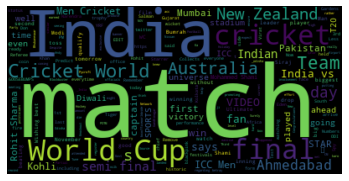

In [23]:
import matplotlib.pyplot as plt

consolidated = ' '.join(word for word in df['cleanedTweets'])

wordCloud = WordCloud(width=400, height=200, random_state=20, max_font_size=119).generate(consolidated)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
import seaborn as sns
df.groupby('segmentation').count()

,tweets,cleanedTweets,tPolarity,tSubjectivity
segmentation,,,,
negative,3,3,3,3
neutral,22,22,22,22
positive,27,27,27,27


<AxesSubplot:xlabel='tPolarity', ylabel='tSubjectivity'>

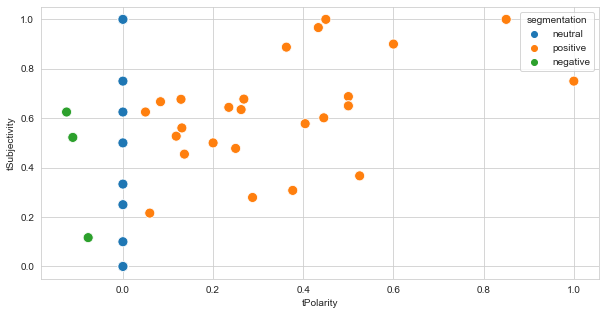

In [25]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='tPolarity',y='tSubjectivity',s=100,hue='segmentation')

<AxesSubplot:xlabel='segmentation', ylabel='count'>

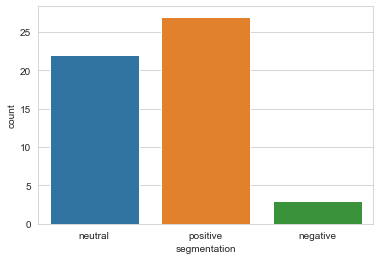

In [26]:
sns.countplot(data=df,x='segmentation')

In [27]:
positive = round(len(df[df.segmentation == 'positive'])/len(df)*100,1)
negative = round(len(df[df.segmentation == 'negative'])/len(df)*100,1)
neutral = round(len(df[df.segmentation == 'neutral'])/len(df)*100,1)

responses = [positive, negative, neutral]
responses

response = {'resp': ['Supporters', 'Opposers', 'Neutral'], 'pct':[positive, negative, neutral]}
pd.DataFrame(response)

,resp,pct
0,Supporters,51.9
1,Opposers,5.8
2,Neutral,42.3
